# Bias-Variance Decomposition Experiments

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

We will use an artificial dataset we create using $\sin$ function:
$$
y = \sin(2\pi x) + \epsilon
$$
where $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

We will use the same $x$ values to generate all datasets to be able to average over $x$. 

In [0]:
NUM_POINTS = 20
x = np.random.uniform(0,1,NUM_POINTS)

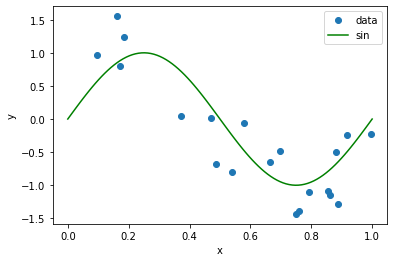

In [45]:
def create_sin_data(x):
    y = np.sin(2*np.pi*x) + np.random.randn(NUM_POINTS)*0.4
    return x, y

def plot_sin():
    t = np.linspace(0,1,num=100)
    plt.plot(t, np.sin(2*np.pi*t), 'g-', label = 'sin')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

x,y = create_sin_data(x)
plt.plot(x,y,'o', label = 'data')
plot_sin()

Sklearn machine learning library has a preprocessing class [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that creates polynomial features up to the given degree including degree 0 which is simply 1. If $x$ is one dimensional and degree is 2, the new feature vector will be $[1, x, x^2]$.  

In [46]:
# Create polynomial features
polynomial_features = PolynomialFeatures(15)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

# Apply regression on the polynomial features. Since Polynomial features extended
# with a 1, one of the weights will simply be the bias and so we set `fit_intercept`
# False to avoid another bias parameter. 
model = LinearRegression(fit_intercept=False)
model.fit(x_poly,y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [0]:
def plot_model(model, polynomial_features, low = 0, high = 1):
    t = np.linspace(low,high,num=100)
    t_poly = polynomial_features.fit_transform(t.reshape(-1,1))
    plt.plot(t, model.predict(t_poly), 'r-', label= "Model")
    plt.plot(x, y, 'ro')
    plt.ylim(-1.5,1.5)
    plt.legend()

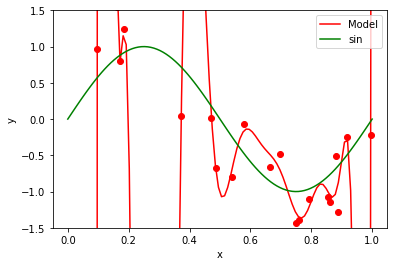

In [48]:
plot_model(model, polynomial_features)
plot_sin()

In [49]:
polynomial_features = PolynomialFeatures(2)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

model = LinearRegression(fit_intercept=False)
model.fit(x_poly,y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

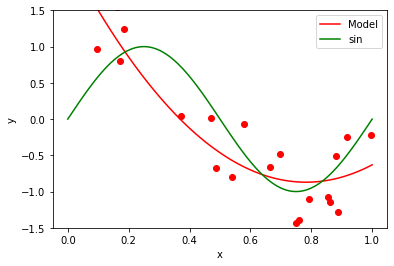

In [50]:
plot_model(model, polynomial_features)
plot_sin()

In [51]:
polynomial_features = PolynomialFeatures(3)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

model = LinearRegression(fit_intercept=False)
model.fit(x_poly,y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

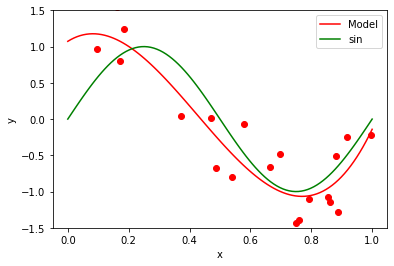

In [52]:
plot_model(model, polynomial_features)
plot_sin()

# Learning curves

In [0]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [0]:
x_train = np.random.uniform(0,1,NUM_POINTS)
x_test = np.random.uniform(0,1,NUM_POINTS)
x_train, y_train = create_sin_data(x_train)
x_test, y_test = create_sin_data(x_test) 

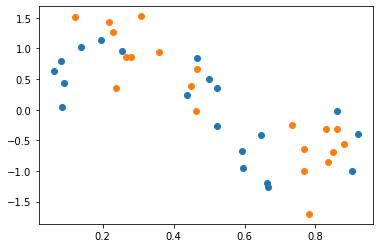

In [66]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'o')

In [0]:
train_errors = []
test_errors = []

for degree in range(0,10):
    polynomial_features = PolynomialFeatures(degree)
    x_train_poly = polynomial_features.fit_transform(x_train.reshape(-1,1))

    model = LinearRegression(fit_intercept=False)
    model.fit(x_train_poly,y_train.reshape(-1,1))
    y_train_pred = model.predict(x_train_poly)

    x_test_poly = polynomial_features.transform(x_test.reshape(-1,1))
    y_test_pred = model.predict(x_test_poly)

    train_errors.append(mean_squared_error(y_train.reshape(-1,1), y_train_pred))
    test_errors.append(mean_squared_error(y_test.reshape(-1,1), y_test_pred))

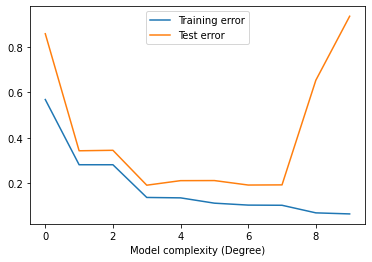

In [72]:
plt.plot(train_errors, label = 'Training error')
plt.plot(test_errors, label = 'Test error')
plt.xlabel('Model complexity (Degree)')
plt.legend()

# Regularization

In [0]:
x,y = create_sin_data(x)

In [30]:
polynomial_features = PolynomialFeatures(15)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

model = LinearRegression(fit_intercept=False)
model.fit(x_poly,y.reshape(-1,1))

regularized_model = Ridge(alpha = np.e**(-10), fit_intercept=False)
regularized_model.fit(x_poly,y.reshape(-1,1))

Ridge(alpha=4.5399929762484875e-05, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

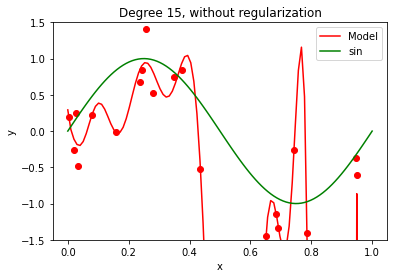

In [31]:
plot_model(model, polynomial_features)
plot_sin()
plt.title('Degree 15, without regularization');

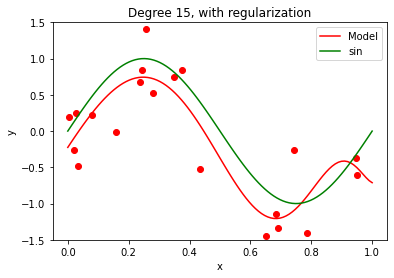

In [32]:
plot_model(regularized_model, polynomial_features)
plot_sin()
plt.title('Degree 15, with regularization');

In [33]:
model.coef_

array([[ 2.92560703e-01, -4.09328024e+01,  2.00534396e+03,
        -7.77613159e+04,  1.96432085e+06, -2.91104101e+07,
         2.65411787e+08, -1.57637969e+09,  6.35245959e+09,
        -1.77950971e+10,  3.49985204e+10, -4.81220186e+10,
         4.52672968e+10, -2.77433061e+10,  9.97651555e+09,
        -1.59618530e+09]])

In [34]:
regularized_model.coef_

array([[ -0.22512011,   6.36671336,  -2.88368372, -30.91817072,
          3.39668067,  22.46253176,  20.37375579,   9.01491922,
         -2.44191049,  -9.90764242, -12.59109049, -11.24152579,
         -7.09191017,  -1.34608739,   5.01999713,  11.30051129]])

# Approximation of the expected values in the Bias-Variance decomposition.

In [0]:
NUM_DATASETS = 20

datasets = []

for i in range(NUM_DATASETS):
    x_train, y_train = create_sin_data(x)
    datasets.append(np.c_[x_train,y_train])

x_test, y_test = create_sin_data(x) 

In [0]:
datasets = np.array(datasets)

In [37]:
datasets.shape

(20, 20, 2)

In [0]:
mean_y_given_x = np.mean(datasets[:,:,1], axis = 0).reshape(-1,1)

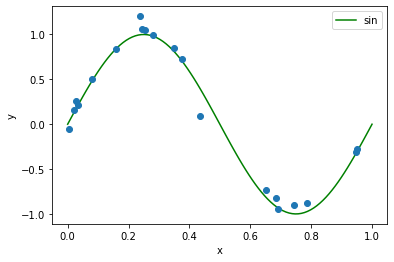

In [39]:
plot_sin()
plt.plot(x, mean_y_given_x, 'o')

In [0]:
def plot_model_without_data(model, polynomial_features, low = 0, high = 1):
    t = np.linspace(low,high,num=100)
    t_poly = polynomial_features.fit_transform(t.reshape(-1,1))
    plt.plot(t, model.predict(t_poly), 'r-')
    plt.ylim(-1.5,1.5)

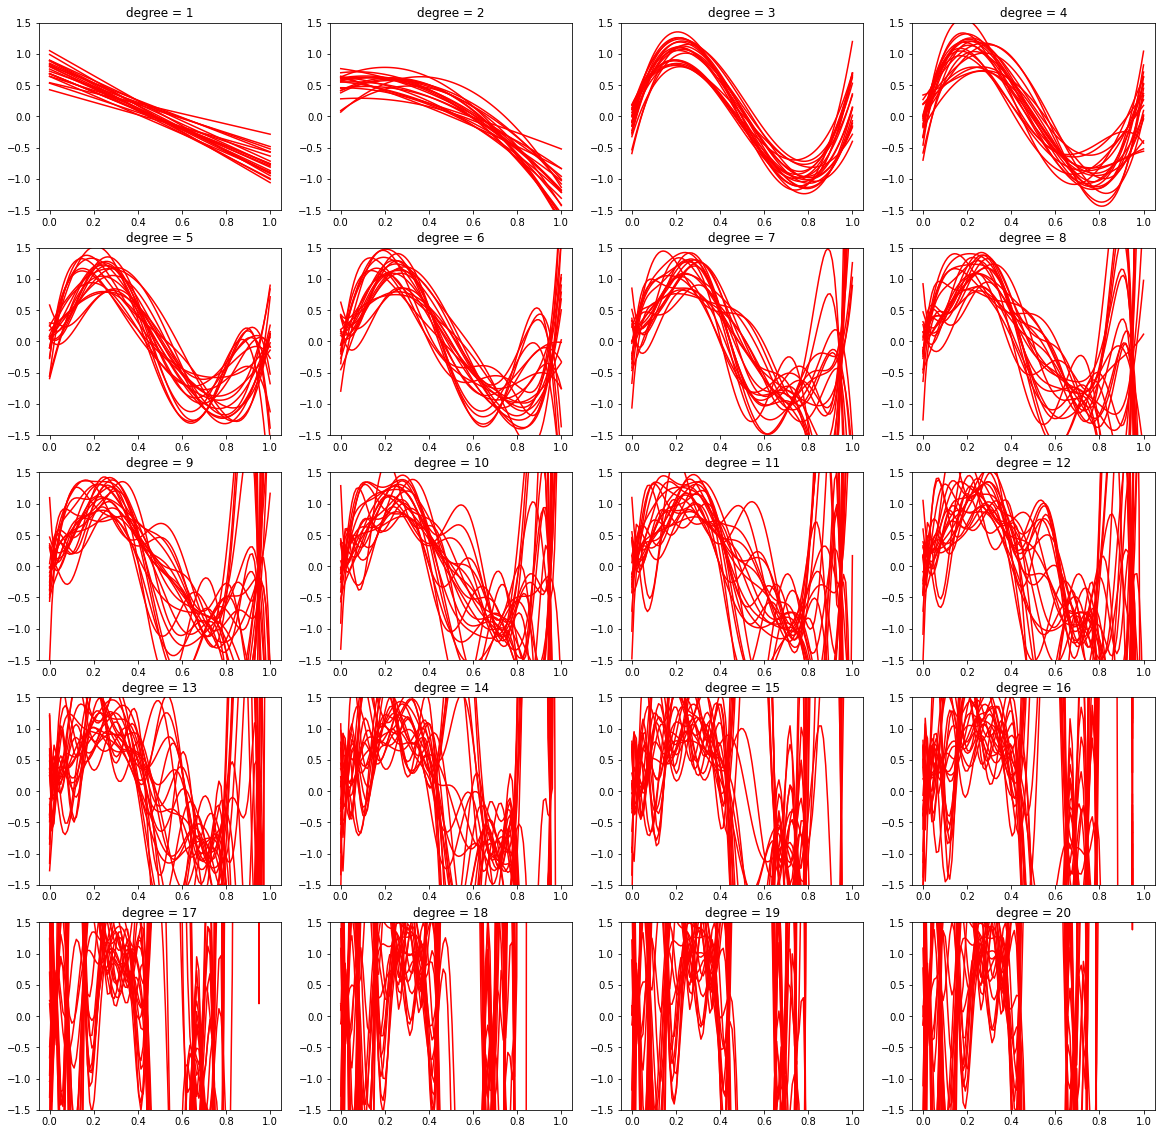

In [41]:
t = np.linspace(0,1,num=100)

plt.figure(figsize = (20,20))

biases = []
variances = []
test_errors = []

degrees = list(range(1,21))

for idx, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    plt.subplot(5,len(degrees)/5,idx+1)
    predictions = np.zeros((NUM_POINTS,1))
    y_preds = []
    test_error = 0

    for dataset in datasets:
        x_train = dataset[:,0].reshape(-1,1)
        y_train = dataset[:,1].reshape(-1,1)

        x_poly = polynomial_features.fit_transform(x_train)
        model = LinearRegression(fit_intercept=False)
        model.fit(x_poly, y_train)
        y_pred = model.predict(x_poly)
        predictions += y_pred
        y_preds.append(y_pred.reshape(-1,1))

        x_test_poly = polynomial_features.transform(x_test.reshape(-1,1))
        y_test_pred = model.predict(x_test_poly)

        plot_model_without_data(model, polynomial_features)
        test_error += mean_squared_error(y_test.reshape(-1,1), y_test_pred)

    plt.title('degree = {}'.format(degree))
    y_preds = np.concatenate(y_preds, axis = 1)
    prediction_average_over_datasets = predictions/NUM_DATASETS
    biases.append(np.mean((prediction_average_over_datasets - mean_y_given_x)**2))
    variances.append(np.mean((y_preds - prediction_average_over_datasets)**2))

    test_errors.append(test_error/NUM_DATASETS)


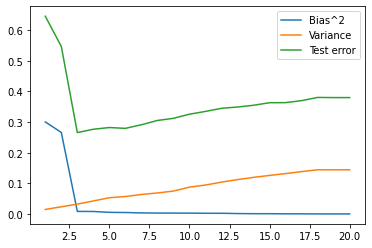

In [42]:
plt.plot(degrees, biases, label = 'Bias^2')
plt.plot(degrees, variances, label = 'Variance')
plt.plot(degrees, test_errors, label = 'Test error')
plt.legend()